# INTRODUCTION

Welcome to **Bellabeat** data analysis case study. **Bellabeat** is a high-tech manufacturer of health focused products for woman. In this case study we will answer key business questions of **Bellabeat** executive team and carry out our data analysis process through these six phases: **Ask , Prepare, Process,Analyze, Share and Act**.


# ABOUT THE COMPANY

**Urška Sršen** and **Sando Mur** founded **Bellabeat**, a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed **Bellabeat** to empower women with knowledge about their own health and habits. Since it was founded in 2013, **Bellabeat** has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

By 2016, **Bellabeat** had opened offices around the world and launched multiple products. Bellabeat products became available through a growing number of online retailers in addition to their own e-commerce channel on their website. The company has invested in traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively. 

**Bellabeat** is a successful small company, but they have the potential to become a larger player in the global smart device market. **Urška Sršen**, cofounder and Chief Creative Officer of **Bellabeat**, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.

**A fitness tracker is a wearable electronic device or a software application that monitors one's physical fitness and daily physical activity.** - dictionary.com


## The Origins of Fitness Trackers


Horologist and inventor Abraham-Louis Perrelet is credited with creating the first, albeit rudimentary, pedometer, while it’s also been suggested that American Founding Father Thomas Jefferson later produced his own mechanical pedometer, improving on Perrelet’s original design.

Fitness trackers, as we know them today, first surfaced in 1965 with the Manpo-kei, which translates to ‘10,000 steps meter’ and was invented by Dr Yoshiro Hatano. Dr Hatano, a Japanese professor at the Kyushu University of Health and Welfare, was researching at the time how to combat obesity.

He posited that 10,000 steps provided the proper balance of caloric intake and activity-based calorie expenditure to maintain a healthy body. Modern fitness trackers to this day still use 10,000 steps as a benchmark goal; however, a recent study published in the International Journal of Obesity suggests that 15,000 steps may actually be a more beneficial target to aim for.

Since the 1960s, fitness tracking devices and the technology underpinning them has developed at a rapid pace. This has been aided by the introduction of wireless heart rate monitors in Polar watches in the 1980s. Later, mobile phones incorporated 3D accelerometers which measure movement and vibration in a three-dimensional space. Nokia’s 5500 Sports handset is credited as the first phone able to accurately track the user’s physical activity.

Link: https://www.hfe.co.uk/blog/a-study-of-fitness-trackers-and-wearables/



# ASK

1. **What are some trends in smart device usage?**

2. **How could these trends apply to Bellabeat customers?**

3. **How could these trends help influence Bellabeat marketing strategy?**



# KEY STAKEHOLDERS

**Urška Sršen**: Bellabeat’s cofounder and chief creative officer.

 **Sando Mur**: Mathematician and Bellabeat’s cofounder, key member of the Bellabeat executive team.
 
 **Bellabeat marketing analytics team**: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing    strategy.
 
# BUSINESS TASK

To gain insight into how consumers use other non Bellabeat smart devices. Using this information, provide high level recommendations for how these trends apply to **Bellabeat** customers and how it can inform **Bellabeat** marketing strategy.


# PREPARE

## About the data

This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between April 2016 to May 2016. Thirty three eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.
 The dataset consists of 18 CSV files and here is the preview of the dataset. 
 
 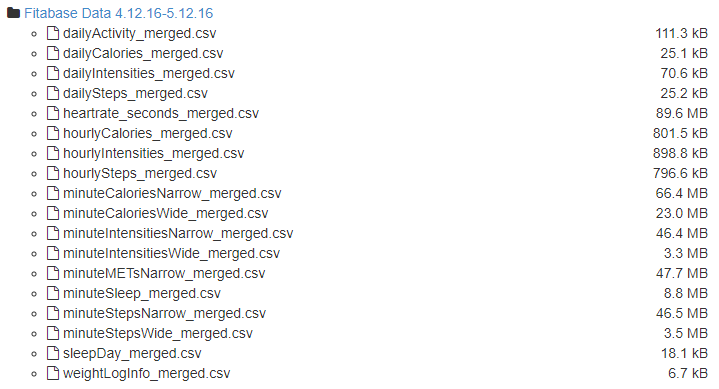
 
 
 Now lets do the **ROCCC** process check for this Fitbit dataset.
 
 1. **Reliable**: The dataset seems to be reliable as it is collected via survey directly from Fitbit users through second party data collectors. It is complete, accurate and we are unable to find if its unbiased since it does not mention any gender. So we can assume it does not have any sampling bias. Although data maybe be reliable, it can be insufficient statistically for data analysis since we are dealing only with 33 users at maximum. 
 
 2. **Original**: The dataset is a second party data collected by Amazon Mechanical Turk via survey . So it is not original . Although it is not original, it is directly collected from 33 Fitbit users who have given their data voluntarily. 
 
 3. **Comprehensive**: The dataset is not comprehensive. It has some missing data for certain users who have provided their data. We should try to answer our questions with whatever data available. But the usability score of the dataset in kaggle is 10 which is the maximum score. So the dataset can be used for data analysis despite its certain limitations.
 
 4. **Current**: The dataset was collected in 2016 so it might be outdated for current use as the usefulness of data decreases with time.
 
 5. **Cited**: The dataset is crowd sourced via survey so it might not be a cited data source. The credibility of data source which is Amazon Mechical Turk seems to be a legit organisation for data collection. So we can consider it as credible data.




In [1]:
library(tidyverse)
library(lubridate)
library(ggplot2)
library(skimr)
library(janitor)
library(dplyr)
library(scales)





# Importing datasets

In [2]:
#Importing the CSV files.

daily_activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_sleep <- read_csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourly_steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
hourly_intensity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
heartrate <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
weight_info <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

#Checking the data and getting an idea of different data types.
head(daily_activity)
head(daily_sleep)
head(hourly_steps)
head(hourly_intensity)
head(hourly_calories)
head(heartrate)
head(weight_info)

glimpse(daily_activity)
glimpse(daily_sleep)
glimpse(hourly_steps)
glimpse(hourly_intensity)
glimpse(hourly_calories)
glimpse(heartrate)
glimpse(weight_info)

**We are importing only the necessary datasets for use and not importing all the 18 CSV files .We are also not using any minute based dataset since we are using hour based dataset for our data analysis process.**

In [3]:
#Counting the number of users.

n_distinct(daily_activity$Id)
n_distinct(daily_sleep$Id)
n_distinct(hourly_steps$Id)
n_distinct(hourly_intensity$Id)
n_distinct(hourly_calories$Id)
n_distinct(heartrate$Id)
n_distinct(weight_info$Id)

**daily_sleep dataset has only 24 unique ids unlike 33 ids for the rest of the datasets. But we will still use it despite such a low samplesize. Also heartrate dataset has only 14 unique ids and weight_info dataset has only 8 unique ids . Since the sample size is very small , we can neglect using both the heartrate and weight_info for our analysis.**

# PROCESS

In [4]:
#Finding the number of duplicated rows in each dataset.

sum(duplicated(daily_activity))
sum(duplicated(daily_sleep))
sum(duplicated(hourly_steps))
sum(duplicated(hourly_intensity))
sum(duplicated(hourly_calories))

daily_sleep has duplicated observations.

In [5]:
#Removing duplicate rows from daily_sleep dataset.

daily_sleep <- distinct(daily_sleep)

#Checking for duplicates after removing the duplicated rows.

sum(duplicated(daily_sleep))

glimpse(daily_sleep)


We can see that 3 rows have been removed and we only have 410 rows instead of 413 rows.

In [6]:
#Finding the number of N/A observations if any in all the datasets.

colSums(is.na(daily_activity))
colSums(is.na(daily_sleep))
colSums(is.na(hourly_steps))
colSums(is.na(hourly_intensity))
colSums(is.na(hourly_calories))


There are no missing values in each of these datasets.

In [7]:
#Making the column names consistent.

daily_activity <- clean_names(daily_activity)
daily_sleep <- clean_names(daily_sleep)
hourly_steps <- clean_names(hourly_steps)
hourly_intensity <- clean_names(hourly_intensity)
hourly_calories <- clean_names(hourly_calories)

#Checking for changes in column names.

colnames(daily_activity)
colnames(daily_sleep)
colnames(hourly_steps)
colnames(hourly_intensity)
colnames(hourly_calories)

In [8]:
#Formatting date and date-time columns.

daily_activity <- daily_activity %>%
  rename(date = activity_date) %>%
  mutate(date = as_date(date, format = "%m/%d/%Y"))

daily_sleep <- daily_sleep %>%
  rename(date = sleep_day) %>%
  mutate(date = as_date(date,format ="%m/%d/%Y %I:%M:%S %p"))

hourly_steps<- hourly_steps %>% 
  rename(date_time = activity_hour) %>% 
  mutate(date_time = as.POSIXct(date_time,format ="%m/%d/%Y %I:%M:%S %p"))

hourly_intensity <- hourly_intensity %>% 
  rename(date_time = activity_hour) %>% 
  mutate(date_time = as.POSIXct(date_time,format ="%m/%d/%Y %I:%M:%S %p"))

hourly_calories<- hourly_calories %>% 
  rename(date_time = activity_hour) %>% 
  mutate(date_time = as.POSIXct(date_time,format ="%m/%d/%Y %I:%M:%S %p"))


head(daily_activity)
head(daily_sleep)
head(hourly_steps)
head(hourly_intensity)
head(hourly_calories)

**In the daily_sleep dataset we change the date time format to date since we require only date and sleep data for that given date.**

**In the other datasets , we have kept the date time format as it is for analysis .**

In [9]:
#Merging datasets by common columns.

daily_activity_sleep <- merge(daily_sleep, daily_activity, by=c('id', 'date'))

hourly_steps.intensity <- full_join(hourly_steps, hourly_intensity, by = c("id", "date_time"))

hourly_data <- full_join(hourly_steps.intensity, hourly_calories, by = c("id","date_time"))

glimpse(hourly_data)
head(hourly_data)
glimpse(daily_activity_sleep)
head(daily_activity_sleep)







**We have merged daily_activity with daily_sleep and we can see that daily_activity_sleep dataset has only 410 rows for 24 unique ids since not all 33 ids have sleep data.**

**We have merged all the hourly data into one dataset called hourly_data with steps , intensities and calories for each hour of the day.**



# ANALYZE

In [10]:
#Getting a summary of each dataset

daily_activity%>%
select(total_steps,total_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories)%>%
summary()

daily_activity_sleep%>%
select(total_sleep_records,total_minutes_asleep,total_time_in_bed)%>%
summary()

hourly_data%>%
select(step_total, total_intensity, average_intensity, calories)%>%
summary()

**Facts based on data summary**

* The average total steps walked by a person daily is 7638 steps.

* The average total distance covered by a person daily is 5.49 kms.

* Of the average total distance covered each day , the very active distance(during intense workouts , running, cycling etc.) covered by a person is 1.5 Kms .

* Majority of the users seem to use fitbit fitness trackers for light activities such as walking etc. Average light active distance per day of a person is 3.3 Kms.
 
* On an average a person is very active for 21.16 minutes , fairly/moderately active for 13.56 minutes and lightly active for 192.8 minutes.
 
* On an average, a person is sedentary for 991.2 minutes or 16 hours per day.
 
* On an average , a person burns 2304 calories per day.
 
* An average sleep of a person is 419.2 minutes or 7 hours per day . They spend an average of 458.5 minutes or 7.64 hours in bed.
 
* On an average a person walks 320 steps per hour with an average total intensity of 12 and an average intensity of 0.2. 

* A person on an average burns 97.39 calories per hour.
 






# Information on Fitbit trackers

 ## What Are Fitbit Active Minutes?

The active minutes measurement tells you when you have spent at least 10 minutes in an activity that burns three times as many calories as you do at rest. When you are at rest, your metabolic equivalent (MET) is 1. Fitbit uses a level of 3 MET or higher to indicate moderate-intensity exercise.

At the 3 MET level, you might be walking briskly or engaging in other exercises that raise your heart rate. Moderate-intensity exercises include:

* Walking briskly at a rate of 3 mph (not speed-walking)
* Elliptical trainer
* Tennis (doubles)
* Water aerobics
* Cycling at less than 10 mph
* Ballroom or line dancing
* Gardening

The 6 MET level indicates vigorous-intensity exercise. Vigorous-intensity exercises include:

* Race walking, jogging, or running
* Hiking uphill or with a heavy backpack
* Cycling at over 10 mph
* Lap swimming
* Fast or aerobic dancing
* Sports that involve lots of running (such as soccer, hockey, basketball, singles tennis)
* Heavy gardening

Based on this , fitbit trackers calculate very active minutes(Vigorous-intensity exercises), fairly active minutes(moderate-intensity exercises) and light active minutes(light-intensity exercises).



In [11]:
#Finding the percentage of very active users , moderately active users and light active users based on total activity time.

Percentage_active_users <- daily_activity%>%
summarise(total_very_active_time= sum(very_active_minutes), total_fairly_active_time= sum(fairly_active_minutes), total_light_active_time= sum(lightly_active_minutes),total_active_time= (total_very_active_time+ total_fairly_active_time+ total_light_active_time))

head(Percentage_active_users)

Percentage_active_users%>%
summarise(percentage_VAU= (total_very_active_time/ total_active_time)*100, percentage_FAU= (total_fairly_active_time/ total_active_time)*100, percentage_LAU= (total_light_active_time/ total_active_time)*100)



 






* VAU: very active users
* FAU: fairly active users
* LAU: lightly active users

**We can see that out of total active time the fitbit trackers have been used for any activity by these 33 users, 9.3% of the time are very active minutes used for very intense exercises by users , 5.96% of the time are fairly active minutes used for moderate intensity exercises, 84.74 % of the time are light active minutes used for light intensity exercises.**

**We do not consider sedentary minutes as it does not come under active minutes. We are checking only for the time when the users were actively using the fitness tracker during some activity.**

# VISUALIZATION/SHARE

Studies have shown that people who walk anywhere between **7,500 to 10,000 steps** per day can **improve blood sugar levels, lower blood pressure, and help improve symptoms of depression and anxiety**. Walking is also a great way to shed pounds. Depending on your weight, walking 7,500 to 10,000 steps a day can burn anywhere between **250 and 600 calories** a day. Since **one pound of body fat equals about 3,500 calories**, you could lose roughly **one pound** per week simply by walking an extra **10,000 steps** every day. 

 We will be doing our classfication of steps based on this article: https://www.medicinenet.com/how_many_steps_a_day_is_considered_active/article.htm



In [12]:
#Classifying users based on average of total steps walked per day.

daily_average <- daily_activity%>%
group_by(id) %>%
summarise (avg_steps = mean(total_steps))

head(daily_average)

steps_user_type <- daily_average %>%
  mutate(user_type = case_when(
    avg_steps < 5000 ~ "sedentary",
    avg_steps >= 5000 & avg_steps < 7499 ~ "lightly active", 
    avg_steps >= 7500 & avg_steps < 9999 ~ "fairly active", 
    avg_steps >= 10000 ~ "very active"
  ))

head(steps_user_type)

In [13]:
#Percentage of user types based on classfication of average number of steps walked per day.

perc_user_type<- steps_user_type%>% 
  group_by(user_type) %>%
  count() %>% 
  ungroup() %>% 
  mutate(perc = `n` / sum(`n`)) %>% 
  arrange(perc) %>%
  mutate(labels = scales::percent(perc))

head(perc_user_type)

In [14]:
#Pie chart of user type distribution based on average number of steps walked per day.

ggplot(perc_user_type, aes(x = "", y = perc, fill = user_type)) +
  geom_col() +
  geom_label(aes(label = labels),
             position = position_stack(vjust = 0.5),
             show.legend = FALSE) +
labs(title="User Type Distribution") +
theme(plot.title = element_text(hjust = 0.5, size=14, face = "bold"),
     legend.text = element_text(size = 12)) +

  coord_polar(theta = "y")


**As we can see from the above pie chart classification of user types based on average steps walked by each user per day over a period of one month.**



### How much sleep is considered as sufficient ?

**Let us consider that all the 24 users who have given their sleep data are all adults . Based on this article https://www.medicalnewstoday.com/articles/medical-myths-how-much-sleep-do-we-need , we will consider people who get an average sleep of 7 hours per day as sufficient sleep and less than that as insufficient sleep.**

In [15]:
#Classifying users based on sleep.

daily_sleep_users <- daily_activity_sleep%>%
group_by(id) %>%
summarise (avg_sleep_time = mean(total_minutes_asleep))

head(daily_sleep_users)

sleep_classification <- daily_sleep_users%>%
  mutate(sleep_type = case_when(
    avg_sleep_time >=420 ~ "Sufficient sleep",
        avg_sleep_time <420 ~ "Insufficient sleep"
  ))

head(sleep_classification)

In [16]:
#Finding percentage of users getting sufficient sleep and insufficient sleep.

perc_sleep_classification <- sleep_classification%>% 
  group_by(sleep_type) %>%
  count() %>% 
  ungroup() %>% 
  mutate(perc = `n` / sum(`n`)) %>% 
  arrange(perc) %>%
  mutate(labels = scales::percent(perc))

head(perc_sleep_classification)





**So out of 24 people who have given their sleep records , only 11 of them are getting sufficient sleep and the rest 13 of them are not getting sufficient sleep. There are also some outliers and missing data in sleep records of most user ids. But out of the data that we have , we have made a sleep type distribution of the users.**

In [17]:
# Pie-chart of sleep type distribution.

ggplot(perc_sleep_classification, aes(x = "", y = perc, fill = sleep_type)) +
  geom_col() +
  geom_label(aes(label = labels),
             position = position_stack(vjust = 0.5),
             show.legend = FALSE) +
labs(title="Sleep Type Distribution") +
theme(plot.title = element_text(hjust = 0.5, size=14, face = "bold"),
     legend.text = element_text(size = 12)) +

  coord_polar(theta = "y")



**As we can see from the above distribution , more than half of the users do not get sufficient sleep and this should be improved for better performance physically and mentally. This may be due to modern day lifestyle where digital electronic devices such as smartphones and tablets are used. The blue light emitted from these devices affects the circadian rhythm and our ability to sleep early in the night. Hence in the modern day, people are unable to sleep early in the night and get sufficient sleep time. Please read this article to see how modern lifestyle affects sleep.**

LINK: https://www.sleepfoundation.org/how-sleep-works/how-your-body-uses-calories-while-you-sleep#:~:text=As%20a%20very%20approximate%20number,metabolic%20rate2%20(BMR).

In [18]:
# Finding the average steps , average intensities , average calories burned by users based on hourly data .


#Separating date-time as date and time columns so that we group by time.

hourly_data$date <- as.Date(hourly_data$date_time)

hourly_data$time <- format(as.POSIXct(hourly_data$date_time),    
                    format = "%H:%M:%S")

hourly_avg <- hourly_data%>%
group_by(time) %>%
summarise (hourly_avg_steps = mean(step_total), hourly_avg_total_intensity= mean(total_intensity), hourly_avg_calories= mean(calories))

head(hourly_data)

head(hourly_avg, n=10)



In [19]:
ggplot(hourly_avg, aes(x = time, y = hourly_avg_steps)) + 
  geom_bar(stat = "identity", fill="red") +
labs(title="Hourly Average Steps",x= "TIME OF THE DAY", y= "AVERAGE STEPS") +
      theme(axis.text.x = element_text(angle = 90),
           plot.title=element_text(size = 20, face = "bold"))


**From the above bar plot, we can see that people are very active around noon 12 pm to 2pm which might be lunchbreak for most working people and they are walking to get lunch either outside or walking to eat lunch in office cafeteria.It can also be active time for other household chores ,activities etc. These people are very active in the evening as well from 5 pm to 7 pm. This must be the time for exercise or evening walk/running. But overall activity of people starts from 8 am and goes till 7 pm in the evening. This is the time frame when the average steps walked is higher than other times during the day.**

In [20]:
ggplot(hourly_avg, aes(x = time, y = hourly_avg_total_intensity)) + 
  geom_bar(stat = "identity", fill="blue") +
labs(title="Hourly Average Total Intensity",x= "TIME OF THE DAY", y= "AVERAGE TOTAL INTENSITY") +
      theme(axis.text.x = element_text(angle = 90),
           plot.title = element_text(size = 20, face = "bold"))


**This is similar to the average steps walked per hour bar plot . People are doing some intense work during noon . Here total intensity means sum of all minute level intensities occured within that hour. Evening time 5 pm to 7 pm also shows the same . This is the time for intense exercises( moderate intensity or high intensity) such as running , swimming , paced walking etc. The total intensity of activity goes up from 8 am till 7 pm. This is the time window when people are actively doing some work during the day.**

In [21]:
ggplot(hourly_avg, aes(x = time, y = hourly_avg_calories)) + 
  geom_bar(stat = "identity", fill="orange") +
labs(title="Hourly Average Calories",x= "TIME OF THE DAY", y= "AVERAGE CALORIES") +
      theme(axis.text.x = element_text(angle = 90),
           plot.title = element_text(size = 20, face = "bold"))


**People keep burning calories through out the day but they burn more calories during some intense activites such as running , swimming, walking etc. These intense activities seem to take place during evening from 5 pm to 7 pm and some time during noon as well from 12 pm to 2pm . Like we summarised in the above hourly data frame , people seem to burn an average of 97.3 calories per hour .Also we see compared to other two bar plots , people seem to burn calories even during sleep. This article https://www.sleepfoundation.org/how-sleep-works/how-your-body-uses-calories-while-you-sleep#:~:text=As%20a%20very%20approximate%20number,metabolic%20rate2%20(BMR)
supports the fact that sleep burns calories especially during the REM stage of sleep.**

In [22]:
# Plotting a graph between total steps walked and total calories burned per day.

ggplot(data = daily_activity)+ 
geom_point(mapping=aes(x = calories, y = total_steps)) + 
   geom_smooth(mapping=aes(x = calories, y = total_steps))+
labs(title="Total Steps Vs Calories Burned",x= "Calories burned", y= "Total steps") +
      theme(axis.text.x = element_text(angle = 90),
           plot.title = element_text(size = 20, face = "bold"))


**Although there are some outliers, we can see that higher the number of steps per day , more is the calorie burnt in the process.**

In [23]:
# Plotting a graph between total distance walked and total calories burned per day.

ggplot(data = daily_activity)+ 
geom_point(mapping=aes(x = calories, y = total_distance)) + 
   geom_smooth(mapping=aes(x = calories, y = total_distance))+
labs(title="Total Distance Vs Calories Burned",x= "Calories burned", y= "Total Distance") +
      theme(axis.text.x = element_text(angle = 90),
           plot.title = element_text(size = 20, face = "bold"))


**This is similar to total steps vs total calories burnt graph. The more the distance walked per day, more is the calorie burnt in the process. There are a few outliers in this plot as well.**

# CONCLUSION/ACT

Based on certain facts and findings from my analysis , i will be giving my recommendations which are as follows. These recommendations apply to both Bellabeat Leaf and Bellabeat Time device since both have features close to the fitbit trackers we have analysed in this . Both are linked to Bellabeat app which can give insights based on the tracker data. 

1. Based on the number of steps walked , we see that there is an equal percentage of lightly active and moderately/fairly active users around 27.3 %. Next to that is sedentary users who are almost 24.2 %. I would suggest bringing in a notification system through the Bellabeat app which can classify their current activity level based on number of steps walked and motivate them to progress from sedentary to lightly active or lightly active to moderately active and so on. This can be done by **sharing research based articles** through app which tells how people can benefit from certain physical activity such as walking , running ,swimming or other sports. Walking anywhere between 7500 and 10000 steps have been proven to improve blood sugar levels, lower blood pressure, and help improve symptoms of depression and anxiety. 

2. Based on sleep data that we have analysed , we see majority of the users do not get sufficient sleep which is 7-8 hours per day as recommended by experts. There should be reminders through Bellabeat app that their sleep time is approaching. This way users might get used to sleeping in the same time and waking up at the same time everyday. Sleep and wake up schedule plays an important role in the circadian rhythm and brain functioning of the body. Sleeping for a sufficient time improves the overall energy levels of the person. Additionally, if we consistently deprive our bodies of sleep for months or years, it increases the risk of developing several conditions, including cardiovascular disease, hypertension, obesity, type 2 diabetes, and some forms of cancer. Articles like these which focus on effects of sleep disruption can be shared through app so that people understand the importance of good night's sleep.
Link: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5449130/

3. Based on our hourly data, we get an idea as to when people are active and doing some light to moderately intense activity during the day. It is usually in the evening for most of the users. Since we keep a track of physical activity of the users, maybe Bellabeat app can give them a **notification** during that time of the day to make exercise or any activity for example walking , walking the dog , cycling etc., as  a part of their regular routine. Once the users get used to it , they will have self motivation to perform that particular physical activity during that time of the day. Apart from tracking things like steps walked , calories burned , activity time etc., people see fitness trackers as a way to motivate them to be physical as well. We can apply the same logic to the users and motivate them to progress in their physical activity slowly from sedentary to lightly intense to moderately intense to very intense.

4. In the modern day , work has become sedentary for most of us . This is causing a lot of health issues as we do not even get sufficient sunlight everyday which is helpful in regulating our circadian rhythm. Back in the days , people used to work hard either in the form of labour , or their work involved a lot of travelling from one place to another. Unfortunately it is not the case in modern day desk based jobs where we sit in an air conditioned rooms and get out only when have to eat or go to the toilet. This is where fitness trackers comes in, to **motivate people** to use fitness trackers to become fit. People look upto to fitness trackers for that motivation and hence we can device fitness plans to people and based on their activity , they can unlock further plans in their Bellabeat app as they progress. Fitness plans can motivate people to work towards their goal progressively without pushing them directly into intense activities. To achieve the best results, you will have to set a realistic goal that can be achieved. You cannot shed weight if you lead a sedentary life and do not exercise. However, if people have a fitness plan, it will help them set and achieve realistic goals within the recommended time frame. It also makes sure that people do not get de-motivated and quit midway.

5. We did not analyze weight and heart rate data since the number of users were very less in that. But with such data , we can calculate calorie intake , Body Mass Index(BMI) , heart rate data . This will be helpful in predicting any underlyging chronic medical conditions.Bellabeat app can suggest taking a complete health checkup if there is any irregularity in the data such as irregular heartbeat or variation of weight with time. Such real time data is very helful in finding any underlying medical condition. Once the health checkup is done, doctors can suggest ways to cure the underlying medical conditions through fitness programs which can be monitored using these trackers. Fitness trackers and medical industry have a lot to benefit from each other since both are based on health of a human. There can be certain incentives to users who use the app regularly for keeping themselves fit. These incentives can range from giving the users some coupon or discount on health checkups to certain hospitals. This way the regular users are benefitted by knowing more about their health parameters which keep them fit. This can work as a motivation towards leading a healthy life through the use of fitness trackers.

6. The **comfort** of wearing fitness trackers must also be taken into consideration. For example, Bellabeat Leaf can be worn as a bracelet , necklace or clip. It has a wide range of use and does not cause any discomfort to the users who wear it all day long . But sometimes ,a watch model like Bellabeat Time can be uncomfortable for the users who are wearing it all day long. Certain modifications can be done to improve the comfort of users who wear such devices. If certain advances can be made where users can strap the fitness trackers to their chest , or use it like earbuds , wear it on their fingers like rings etc., it would improve the comfortability and usability of the fitness trackers more and more data can be obtained from the users.

7. Other incentives like top ups to fitness plan or a demo usage subscription of a certain partnered health based apps can be given to the users who keep progressing in their daily fitness goals . Bellabeat app should have a **reward system** since rewards boost the user motivation and make them achieve their fitness goals more . This in turn will increase the number of people looking towards fitness trackers to keep track of their physical activity and health as well. Bellabeat can achieve their marketing goals by implementing these ideas so that both the company and the users benefit from each other.



   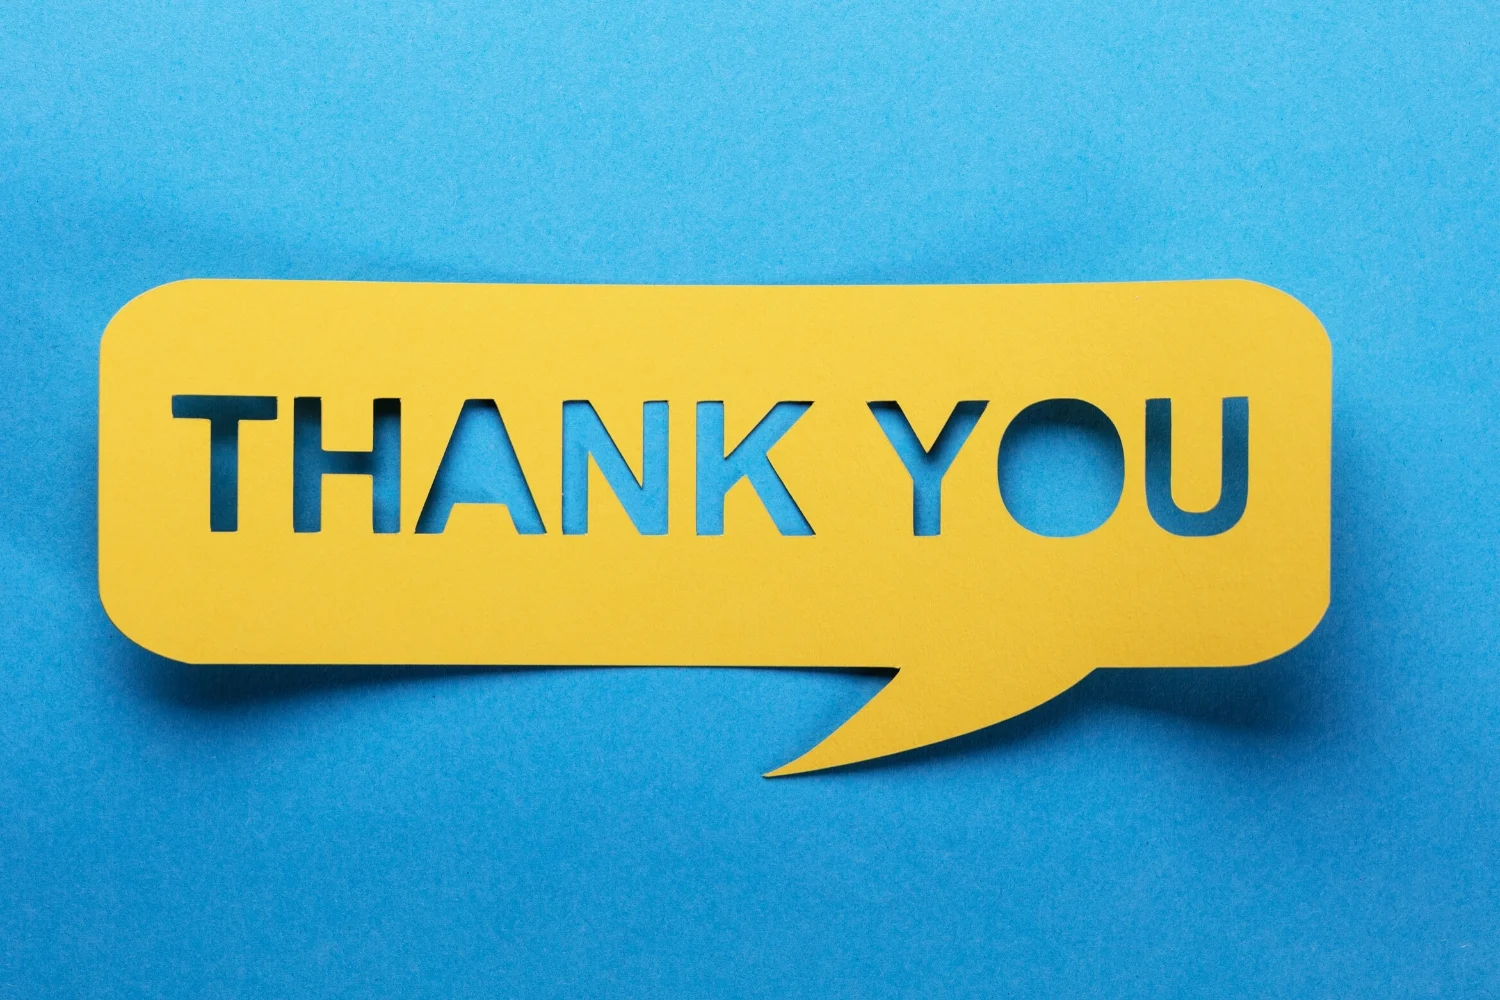